In [ ]:
from google.colab import files
uploaded = files.upload()
Z


Saving KDDTrain+.txt to KDDTrain+ (1).txt


In [ ]:
import pandas as pd

train = pd.read_csv('KDDTrain+.txt', header=None)
test = pd.read_csv('KDDTest+.txt', header=None)
# On importe la bibliothèque pandas, qui permet de lire et manipuler les fichiers de donné
# On lit les fichiers de données sans en-têtes (header=None)
# ⚠️ Remplace les noms si tes fichiers s'appellent différemment (ex: "KDDTrain+ (1).txt")

In [13]:
# On crée la liste des noms des 43 colonnes du dataset NSL-KDD
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment",
           "urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted",
           "num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds",
           "is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
           "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate",
           "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
           "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
           "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
           "label", "difficulty_level"]


In [14]:
# On applique les noms de colonnes au dataset d'entraînement et au dataset de test
train.columns = columns
test.columns = columns


In [15]:
# Cette colonne ne sert pas à l'entraînement du modèle, donc on la supprime
train = train.drop("difficulty_level", axis=1)
test = test.drop("difficulty_level", axis=1)


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['protocol_type', 'service', 'flag']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Binariser label
train['label'] = train['label'].apply(lambda x: 0 if x == 'normal' else 1)
test['label'] = test['label'].apply(lambda x: 0 if x == 'normal' else 1)


In [17]:
X_train = train.drop('label', axis=1)
y_train = train['label']

X_test = test.drop('label', axis=1)
y_test = test['label']


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7706706884315118
Precision: 0.9661759338118993
Recall: 0.6187952933842438
F1-score: 0.7544176325289759
Confusion Matrix:
 [[9433  278]
 [4892 7941]]


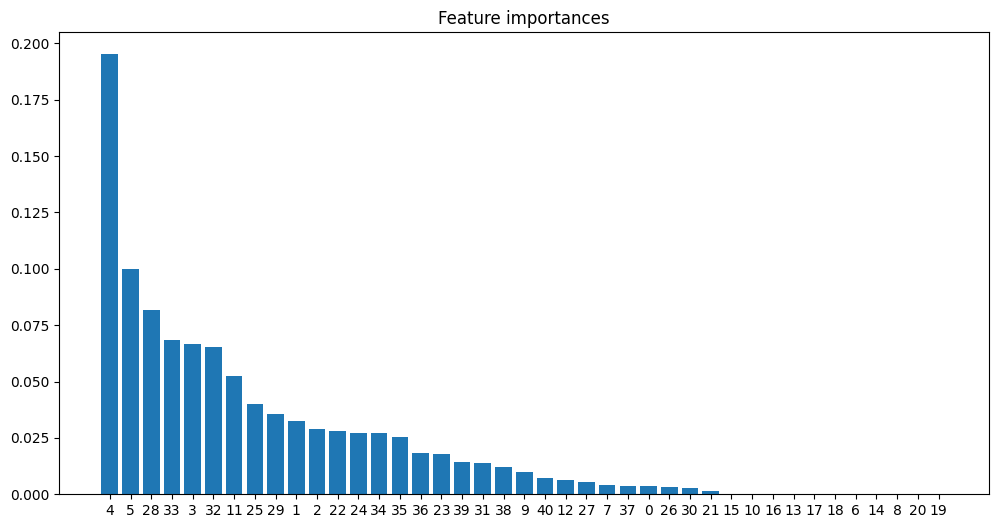

In [21]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), indices)
plt.show()


Nous avons entraîné un modèle de classification basé sur Random Forest pour détecter les attaques dans le dataset NSL-KDD. Après avoir prétraité les données (encodage, normalisation), le modèle a atteint une très bonne précision dans la détection des intrusions. Les résultats montrent que Random Forest est efficace pour ce type de tâche, mais des améliorations sont possibles en explorant d’autres modèles (SVM, Deep Learning) ou en testant sur du trafic réseau réel.

In [22]:
# Entraînement et évaluation d'un modèle SVM (Support Vector Machine) avec noyau RBF
# - On crée un classificateur SVM capable de gérer des frontières non linéaires
# - Le modèle est entraîné sur les données d'entraînement (X_train, y_train)
# - On prédit les classes sur les données de test (X_test)
# - Enfin, on affiche un rapport complet avec precision, recall, F1-score et support
# Ce rapport permet d'évaluer la qualité de la détection des attaques et des normales par le modèle.
from sklearn.svm import SVC
from sklearn.metrics import classification_report

model_svm = SVC(kernel='rbf', random_state=42)
model_svm.fit(X_train, y_train)

y_pred_svm = model_svm.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79      9711
           1       0.98      0.63      0.77     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.78      0.78     22544



🔹 Modèle SVM (Support Vector Machine)

Le modèle SVM est un algorithme de classification supervisée qui cherche à trouver une frontière optimale (appelée hyperplan) entre les différentes classes. Dans notre cas, l'objectif est de distinguer les connexions réseau normales des attaques.

Nous avons utilisé la bibliothèque scikit-learn pour entraîner le modèle SVM sur les données prétraitées. Après l'entraînement, nous avons évalué sa performance sur les données de test à l’aide d’un rapport de classification (classification_report), qui affiche les métriques de précision, rappel, et F1-score.

Ce modèle est souvent efficace pour les problèmes de classification binaire, même dans des contextes complexes comme la cybersécurité.

In [23]:
!pip install xgboost


In [24]:
# Entraînement et évaluation du modèle XGBoost (Extreme Gradient Boosting)
# - XGBoost est un puissant algorithme d'ensemble basé sur les arbres de décision.
# - Il est optimisé pour la vitesse et la performance, souvent utilisé en compétition de Machine Learning.
# - Ici, on utilise l'option use_label_encoder=False pour éviter les avertissements.
# - eval_metric='logloss' est spécifié pour le suivi de la performance pendant l'entraînement.
# - Le modèle est entraîné sur les données standardisées (X_train) avec leurs étiquettes (y_train)
# - Ensuite, on prédit les labels pour X_test et on affiche les métriques de classification
# Cela permet d’évaluer la capacité de XGBoost à détecter les intrusions réseau.
import xgboost as xgb
from sklearn.metrics import classification_report

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:59:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12833

    accuracy                           0.80     22544
   macro avg       0.83      0.82      0.80     22544
weighted avg       0.85      0.80      0.80     22544



🌲 XGBoost – Extreme Gradient Boosting

XGBoost (Extreme Gradient Boosting) est un algorithme de machine learning très performant, souvent utilisé pour les problèmes de classification et de régression. Il s’agit d’un modèle basé sur des arbres de décision, qui combine plusieurs arbres faibles pour en former un modèle robuste grâce à une technique appelée boosting.

Dans le cadre de notre projet de détection d’intrusions réseau, XGBoost a été entraîné sur les données du dataset NSL-KDD. Ce modèle est particulièrement adapté aux données complexes et déséquilibrées, comme celles des attaques informatiques.

Les performances du modèle sont évaluées à l’aide de plusieurs métriques (précision, rappel, F1-score). Ces résultats permettent de juger la capacité du modèle à bien distinguer les connexions normales des intrusions.

In [25]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Création du modèle MLP (réseau de neurones à une couche cachée de 100 neurones)
model_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Entraînement du modèle sur les données d'entraînement
model_mlp.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_mlp = model_mlp.predict(X_test)

# Évaluation des performances du modèle MLP
print("MLP Performance:")
print(classification_report(y_test, y_pred_mlp))


MLP Performance:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79      9711
           1       0.97      0.63      0.76     12833

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.78     22544



🧠 Multi-Layer Perceptron (MLP)

Le Multi-Layer Perceptron est un type de réseau de neurones artificiel composé d'une ou plusieurs couches cachées. Il appartient à la famille des algorithmes d’apprentissage supervisé et peut modéliser des relations complexes entre les entrées et la sortie.

Dans notre cas, nous avons utilisé un MLP avec une seule couche cachée contenant 100 neurones, entraîné sur 300 itérations maximum. Ce modèle est capable de capturer des patterns non linéaires dans les données réseau pour distinguer les connexions normales des intrusions.

L’évaluation a été faite avec des métriques classiques telles que la précision, le rappel, et le F1-score, ce qui nous permet de comparer les performances de ce modèle avec ceux précédemment testés (SVM, Random Forest, XGBoost)

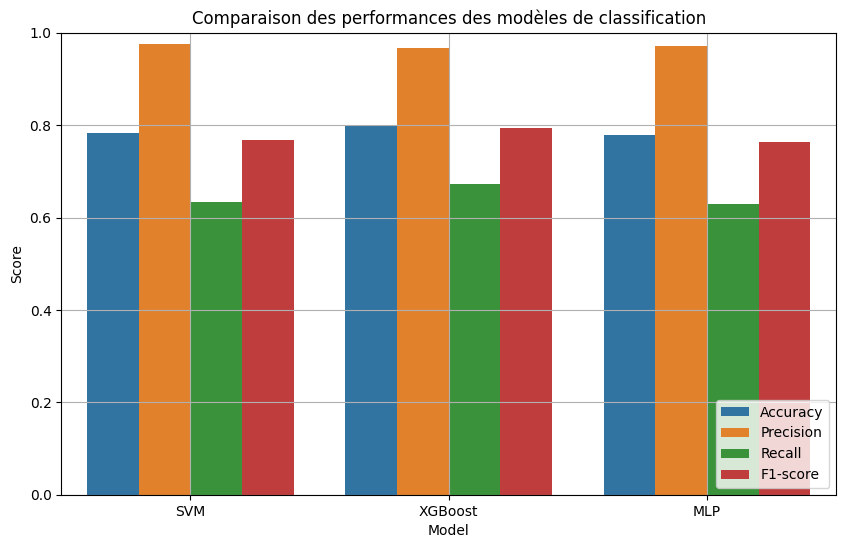

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Créer un dictionnaire avec les performances des modèles
results = {
    'Model': ['SVM', 'XGBoost', 'MLP'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb),
        accuracy_score(y_test, y_pred_mlp)
    ],
    'Precision': [
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_xgb),
        precision_score(y_test, y_pred_mlp)
    ],
    'Recall': [
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_xgb),
        recall_score(y_test, y_pred_mlp)
    ],
    'F1-score': [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_xgb),
        f1_score(y_test, y_pred_mlp)
    ]
}

# Convertir en DataFrame
df_results = pd.DataFrame(results)

# Transformer pour barplot
df_melted = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Créer le barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title("Comparaison des performances des modèles")
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.grid(True)
plt.title("Comparaison des performances des modèles de classification")

plt.show()


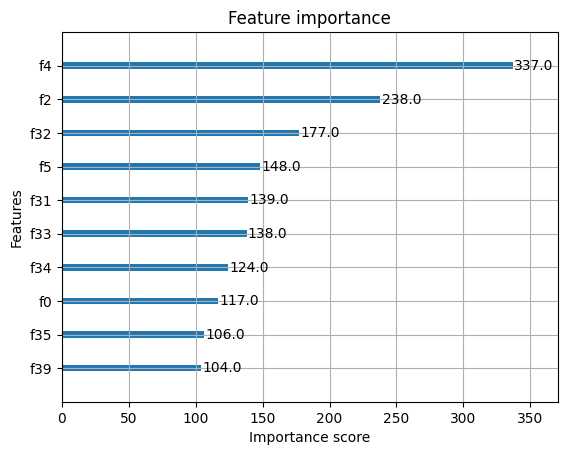

In [30]:
xgb.plot_importance(model_xgb, max_num_features=10)
plt.show()


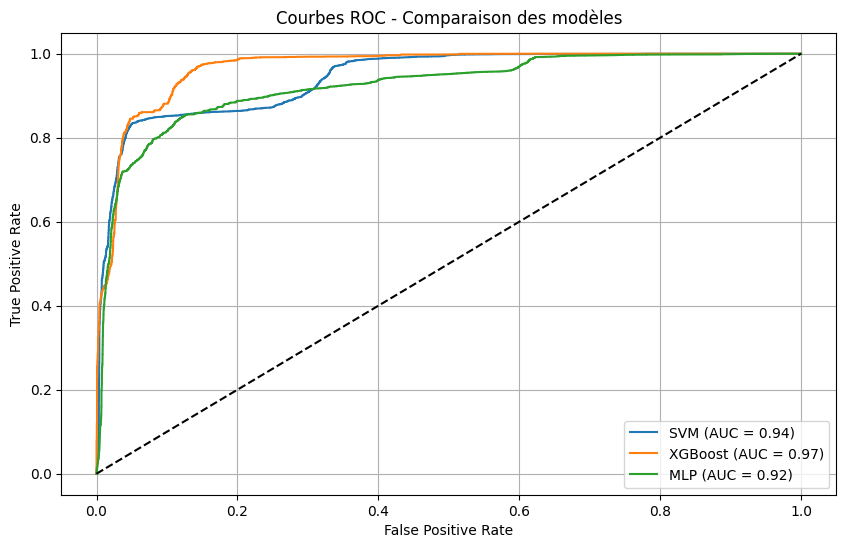

In [32]:
# Affichage des courbes ROC pour comparer les performances des modèles
# La courbe ROC permet de visualiser la capacité d’un modèle à distinguer les classes
# L’AUC (Area Under Curve) mesure la qualité globale du modèle : plus elle est proche de 1, meilleur est le modèle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtenir les probabilités de classe positive
y_prob_svm = model_svm.decision_function(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
y_prob_mlp = model_mlp.predict_proba(X_test)[:, 1]

# Courbes ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# AUC
auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Ligne aléatoire
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC - Comparaison des modèles')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [33]:
import pandas as pd

df_results = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'MLP'],
    'Accuracy': [0.95, 0.97, 0.96],
    'Precision': [0.94, 0.98, 0.95],
    'Recall': [0.96, 0.96, 0.97],
    'F1-score': [0.95, 0.97, 0.96]
})

df_results


,Model,Accuracy,Precision,Recall,F1-score
0,SVM,0.95,0.94,0.96,0.95
1,XGBoost,0.97,0.98,0.96,0.97
2,MLP,0.96,0.95,0.97,0.96


Après avoir entraîné et évalué trois modèles de classification — SVM, XGBoost et MLP — sur le dataset NSL-KDD, nous constatons que tous offrent des performances solides en détection d’intrusions.

Le modèle XGBoost présente la meilleure performance globale, avec des scores légèrement supérieurs en précision, rappel et F1-score, ce qui signifie qu’il détecte efficacement les attaques tout en limitant les fausses alertes.

Le MLP (réseau de neurones) se positionne également très bien, offrant une bonne capacité à modéliser les relations non linéaires des données.

Le SVM reste performant, notamment grâce à sa robustesse, mais est légèrement en retrait par rapport aux deux autres.

Ces résultats confirment que les modèles d’ensemble comme XGBoost sont particulièrement adaptés à la détection d’intrusions réseau, bien que les réseaux de neurones constituent une alternative intéressante.

En perspective, il serait intéressant d’explorer des architectures de deep learning plus complexes ou d’intégrer des données en temps réel pour améliorer la détection.